In [ ]:
! pip install matplotlib
! pip install seaborn

In [2]:
import numpy as np
import pandas as pd

In [3]:
import matplotlib.pyplot as plt

## Des jeux de données pratiques et intéressants pour apprendre la DataViz

* Les données utilisées en exemple par mon collègue Virgile Pesce dans son cours[« sciences des données »](https://github.com/virgilus/science-des-donnees) (répertoire data)

* Les données préparées par les membres de [Our World in Data](https://github.com/owid) notamment le dépôt [owid-datasets](https://github.com/owid/owid-datasets). N’oubliez pas de visiter [leur site](https://ourworldindata.org/)

* Sur Kaggle, des jeux de données « simples » comme
[carbon emissions](https://www.kaggle.com/datasets/txtrouble/carbon-emissions) ou
[US oil & gas production](https://www.kaggle.com/datasets/djzurawski/us-oil-and-gas-production-june-2008-to-june-2018)

Vos exercices pratiques consisteront à reproduire les manips présentées avec différents jeux de données parmi ces exemples.

Nous utiliserons aussi des données proposées par Wes McKinney (créateur de Pandas) pour illustrer son ouvrage :
[Python for Data Analysis](https://github.com/wesm/pydata-book/tree/3rd-edition/datasets) notamment : haiti.csv sur les tremblement de terre en 2010 pour de la visualisation d’info géospatiale à la fin du cours.

Créez un dossier data/ à côté de votre notebook, et téléchargez-y les fichiers de données que vous voudrez utiliser.

Vos meilleures amies seront :
* la [doc](https://matplotlib.org/stable/) de MatplotLib
* les [cheatsheets](https://matplotlib.org/cheatsheets/)

Au fait, vous connaissez [Zeal](https://zealdocs.org/) ? Il permet de consulter en local de nombreuses docs, dont celle de MatplotLib (et Pandas, et Numpy, et Python…)

## Matplotlib basics

### Créer un graphe

On peut très directement afficher en 2D une suite de données, à partir de deux listes, l’une correspondants aux abscisses l’autre aux ordonnées :

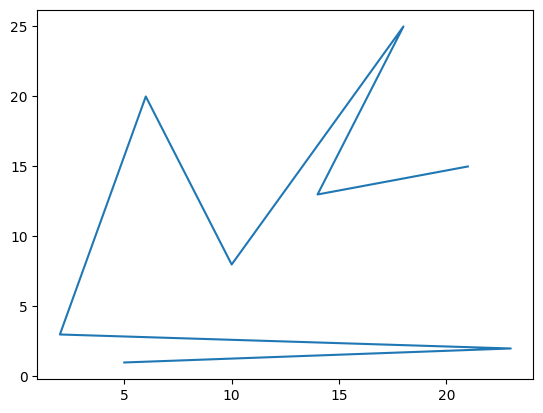

In [7]:
x = [5, 23, 2, 6, 10, 18, 14, 21]
y = [1, 2, 3, 20, 8, 25, 13, 15]

plt.plot(x, y)
plt.show()

```plt.show()``` déclenche l’affichange de la fenêtre contenant le graphe. Obligatoire si on code dans un module (fichier .py) mais optionnel dans Jupyter Notebook (dans ce cas mettre un ```;``` à la fin de la ligne contenant la méthode ```plt.plot()``` pour inhiber l’output de la cellule).

### Type de graphes

```plt.plot()``` affiche des lignes contigues. Mais ce n’est pas adapté à toutes les données (cela ne fait sens que pour les données dans l’ordre en abscisses, et dont le type est continu). On dispose d’autres méthodes pour différents types de graphes :

#### Nuages de point :

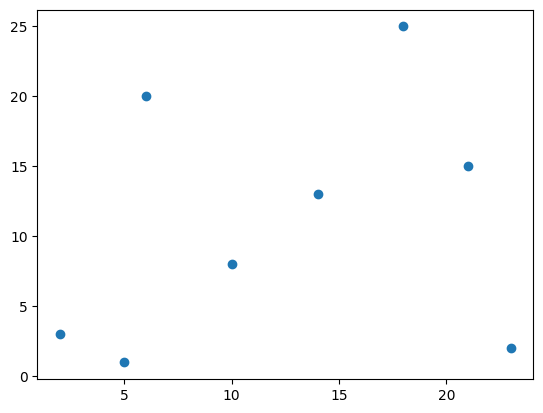

In [8]:
plt.scatter(x, y);

#### Barplot

Utilisés pour représenter des quantités dans différents ensembles discrets (catégories, périodes, etc.) qui peuvent être ordonnées, ou pas :

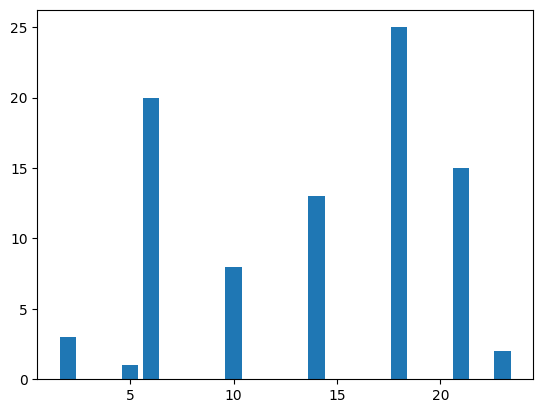

In [9]:
plt.bar(x, y);

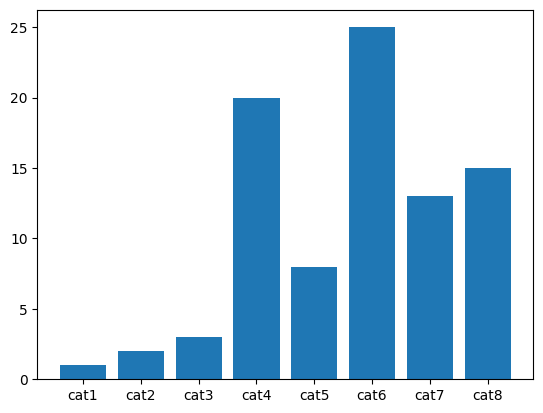

In [10]:
x2 = ['cat1', 'cat2', 'cat3', 'cat4', 'cat5', 'cat6', 'cat7', 'cat8']
plt.bar(x2, y);

#### Histogrammes

Il ne faut pas confondre barplots et histogrammes. Les histogrammes permettent de représenter par une surface une quantité. Très utilisés pour visualiser des distributions :

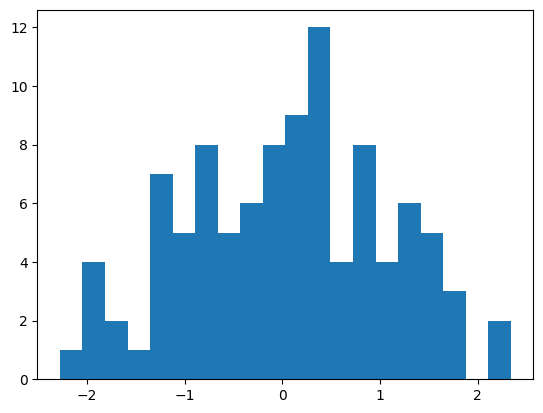

In [11]:
n = np.random.normal(size=100)
plt.hist(n, bins=20);

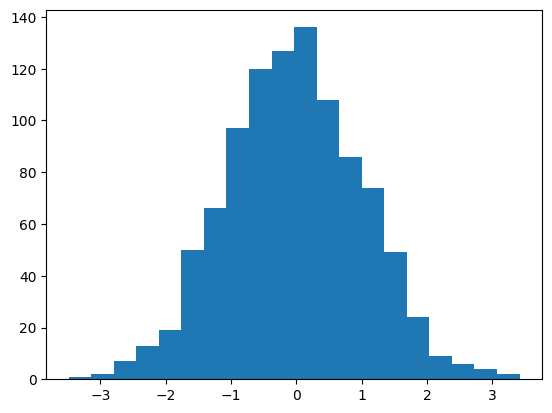

In [12]:
n = np.random.normal(size=1000)
plt.hist(n, bins=20);

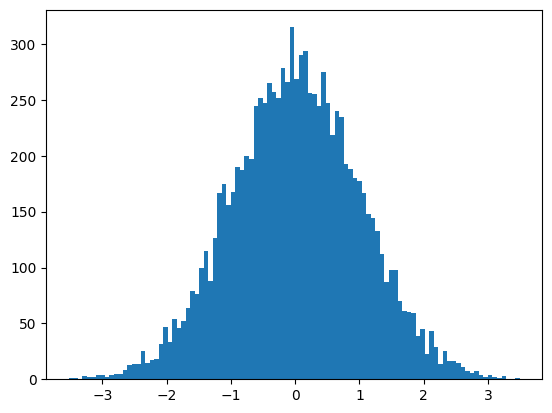

In [13]:
n = np.random.normal(size=10000)
plt.hist(n, bins=100);

### Mise en forme

Le but de la visualisation est de rendre l’information plus parlante, de faciliter la compréhension et que la représentation soit fidèle (c.-à-d. n’induise pas de biais, p.-ex. adopter une échelle et un recadrage qui grossit des différences là où il n‘y en a pas). Il faut donc respecter certaines normes pratiques afin que la dataviz parvienne à son objectif :

- donner un titre clair qui explicite ce qui est représenté
- donner un nom aux axes pour comprendre les variables qui sont reportées
- une légende avec un code couleur bien choisi qui améliore la lisibilité
- une échelle et un marquage des axes qui permette de lire facilement les quantités

En particulier, du point de vu éthique, on peut être attentif à l’accessibilité, notamment pour un  public malvoyant ou daltonien, mais qui peut également être affecté d’autres types de difficultés : cognitives, motrices…

Plus d’informations sur l’accessibilité dans [cet article](https://thevizcollective.starschema.com/posts/accessibility-and-data-visualization) d’un collectif de professionnel-le-s de la dataviz (tout le site est très intéressant).

Il existe plusieurs manières de mettre en forme des graphiques de matplotlib, dont les deux principales sont : 
- utiliser une méthode spécifique qui modifie un attribu particulier pour chaque objet composant le graphique qu’on veut modifier
- passer des arguments a la méthode ```.set()``` de la classe Axes 

#### Méthodes

Ces méthodes sont bien-sûr à appeler avant ```plt.show()```

* ajouter un titre :

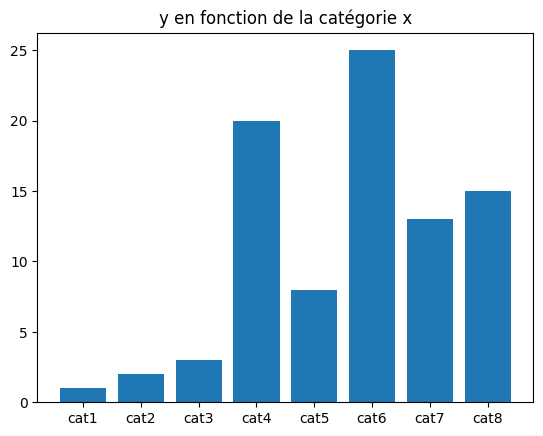

In [14]:
plt.bar(x2, y)

plt.title('y en fonction de la catégorie x')

plt.show()

Vous remarquerez que le titre décrit très factuellement ce que le graphe représente.

Bien sûr, avec un tel titre, on aimerait bien avoir d’indiquer ce que chaque axe représente.

* modifier les labels sur les axes :

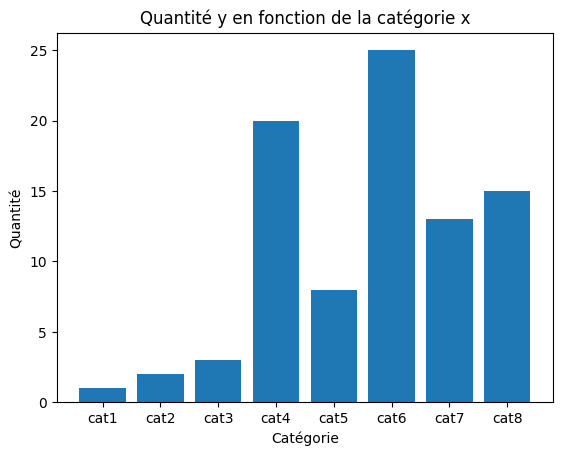

In [15]:
plt.bar(x2, y)
plt.title('Quantité y en fonction de la catégorie x')

plt.xlabel('Catégorie')
plt.ylabel('Quantité')

plt.show()

* définir les graduations des axes :

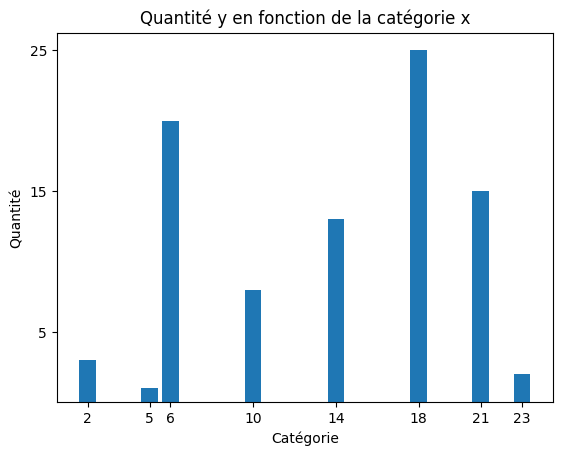

In [16]:
plt.bar(x, y)
plt.title('Quantité y en fonction de la catégorie x')
plt.xlabel('Catégorie')
plt.ylabel('Quantité')

plt.xticks(x)
plt.yticks([5, 15, 25])

plt.show()

* les limites des axes (l’échelle) :

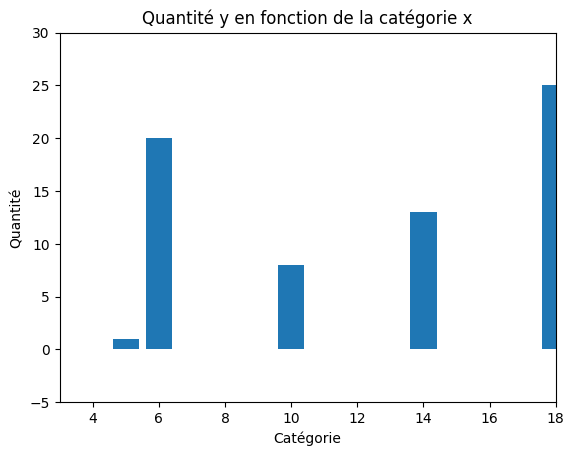

In [17]:
plt.bar(x, y)
plt.title('Quantité y en fonction de la catégorie x')
plt.xlabel('Catégorie')
plt.ylabel('Quantité')

plt.xlim([3, 18])
plt.ylim([-5, 30])

plt.show()

* ajouter une légende (utile surtout quand plusieurs variables sont affichées simultanéments) :

In [18]:
y2 = [2, 6, 2, 6, 6, 8, 7, 10]
y3 = [2, 4, 6, 8, 10, 12, 14, 16]
x.sort()

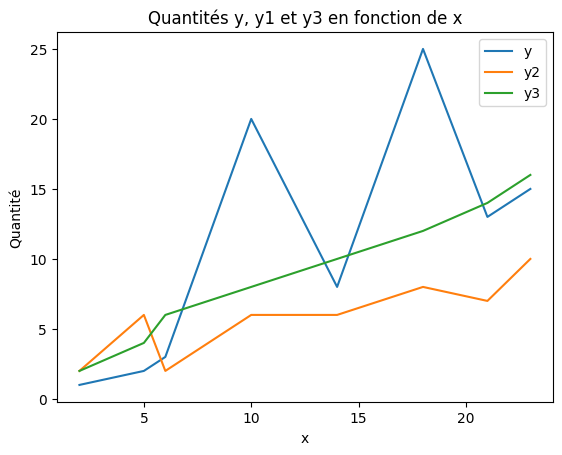

In [19]:
plt.plot(x, y, label='y')
plt.plot(x, y2, label='y2')
plt.plot(x, y3, label='y3')
plt.title('Quantités y, y1 et y3 en fonction de x')
plt.xlabel('x')
plt.ylabel('Quantité')

plt.legend(loc='best') #choisi le meilleur emplacement pour placer le cadre de la légende

plt.show()

* ajouter une grille (pour améliorer la lisibilité) :

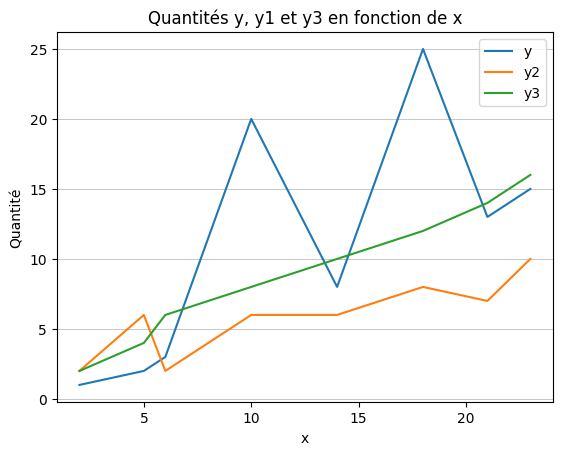

In [20]:
plt.plot(x, y, label='y')
plt.plot(x, y2, label='y2')
plt.plot(x, y3, label='y3')
plt.title('Quantités y, y1 et y3 en fonction de x')
plt.xlabel('x')
plt.ylabel('Quantité')
plt.legend(loc='best')

plt.grid(axis='y', linewidth=0.5)

plt.show()

#### ```Axes.set()```

Pour certains éléments, on peut obtenir le même résultat en passant certains arguments à la méthode ```ax.set()```.
Il faut auparavant instancier notre graphique explicitement :

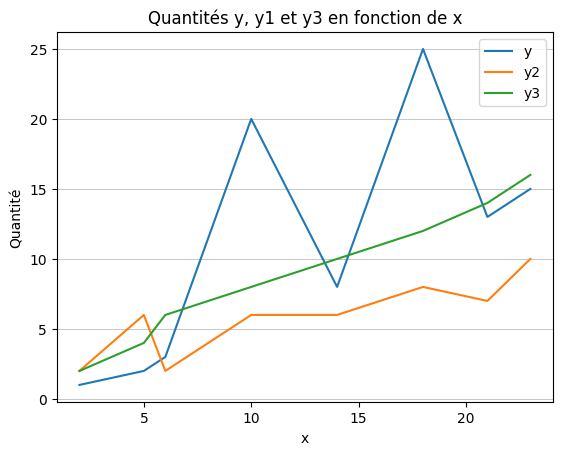

In [21]:
fig, ax = plt.subplots()

ax.plot(x, y, label='y')
ax.plot(x, y2, label='y2')
ax.plot(x, y3, label='y3')

ax.set(title='Quantités y, y1 et y3 en fonction de x', 
       xlabel='x',
       ylabel='Quantité')

ax.legend(loc='best')
ax.grid(axis="y", linewidth=0.5)

plt.show()

* fixer la taille d’un graphe (figure) :

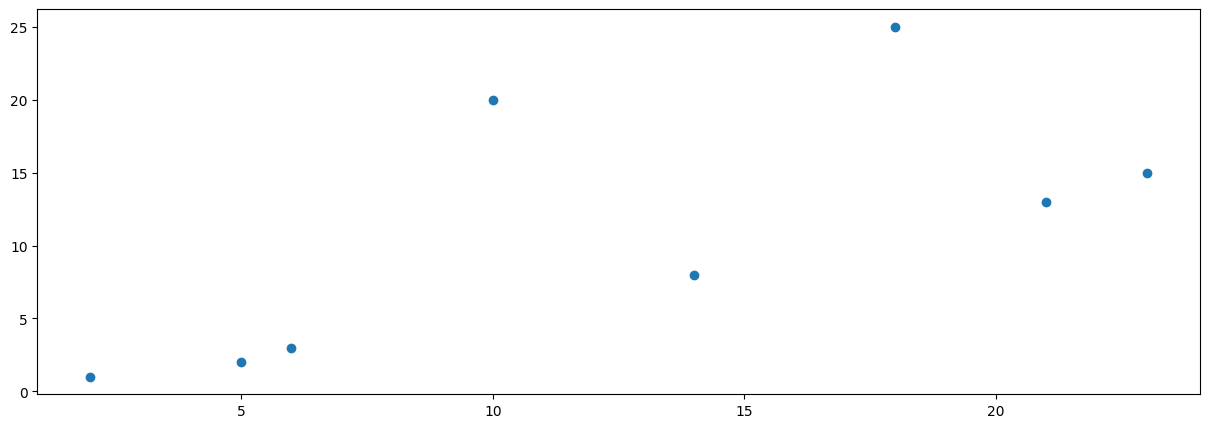

In [22]:
fig, ax = plt.subplots(figsize = (15, 5))

ax.scatter(x,y)

plt.show()

### La classe Axes (```matplotlib.Axes```)

```plt.subplots()``` retourne un objet ```figure``` et un objet ```axes```. Ce dernier représente le tracé d’un graphe/sous-graphe (plot) dans une figure, et contient le tracé des données, les axes (**axis** attention à la nuance), les labels, la légende, etc.

Attention à ne pas confondre.
Par exemple si pour fixer le titre d’un graphe nous avons vu la méthode ```plt.title()```, pour les Axes c’est la méthode ```Axes.set_title``` :

In [ ]:
fig, ax = plt.subplots()

ax.scatter(x,y)
ax.set_title('Quantités y, y1 et y3 en fonction de x')

plt.show()

On peut accéder à l’Axes généré par ```plt.plot()``` par exemple (et les autres méthodes générant les autres types de graphe) avec la méthode ```plt.gca()``` :

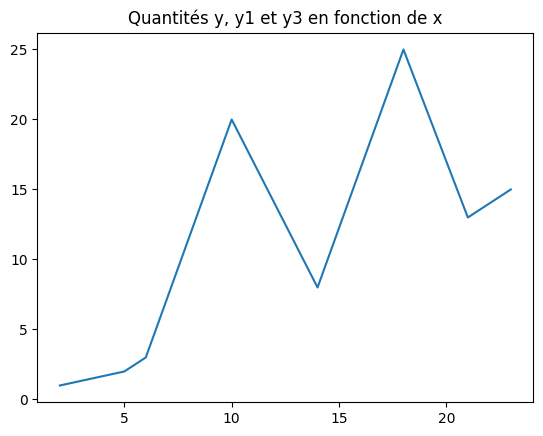

In [23]:
plt.plot(x,y)

ax = plt.gca()

ax.set_title('Quantités y, y1 et y3 en fonction de x')

plt.show()

Quand, avec pandas, vous faites un ```df.plot()```, cette méthode vous retourne bien un objet de la classe Axes, que vous pouvez manipuler comme tel :

In [24]:
df = pd.DataFrame.from_dict(data= { 'x': x, 'quantité y': y}, orient='columns')
df.set_index('x', inplace = True)
df

,quantité y
x,
2,1
5,2
6,3
10,20
14,8
18,25
21,13
23,15


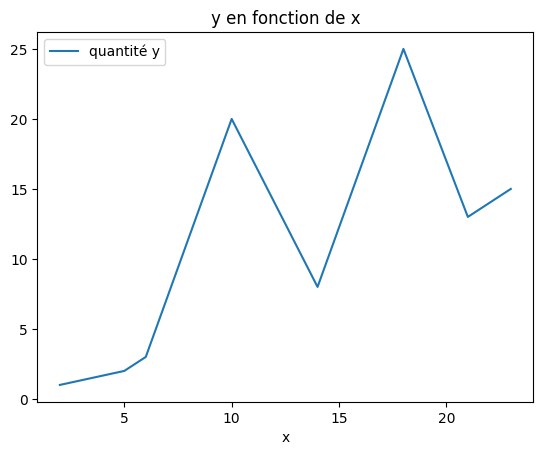

In [25]:
ax = df.plot()

ax.set_title('y en fonction de x')

plt.show()

* changer l’apparence du cadre (```Axes.spines```)

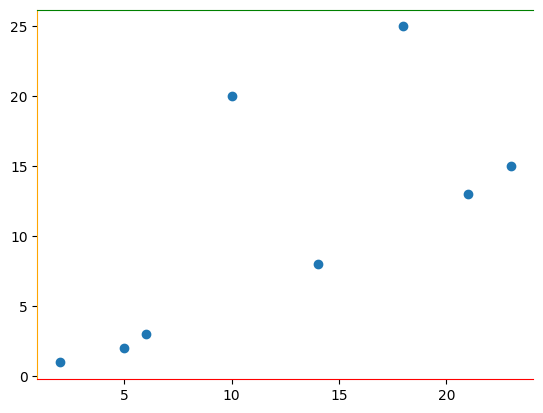

In [26]:
fig, ax = plt.subplots()

ax.scatter(x,y)

ax.spines['right'].set_color(None)
ax.spines['top'].set_color('green')
ax.spines['bottom'].set_color('red')
ax.spines['left'].set_color('orange')

plt.show()

Dans [la cheatsheets](https://matplotlib.org/cheatsheets/_images/cheatsheets-1.png) de MatplotLib, vous avez une figure qui indique chaque élément d’un graphe, et comment les modifier. Des éléments dont nous n’avons pas parlé sont ceux qui représententent les données : barres, points, lignes… ils peuvent être modifiés également.



## Exercise time !

Je vous invite donc, à titre d’exercice, à charger dans un dataframe un des fichiers suggérés au début du notebook, et de créer des graphes en les modifiant comme nous venons de le voir (avec titres, légende, etc.) et en modifiant également les lignes, barres ou point (marker), en vous référant à la documentation de MatplotLib.

Pour certains jeux de données, vous aurez certainement à faire des ```.to_datetime()```. Profitez-en pour faire également des ```.groupby()``` (en fonction des mois, des années, des pays, des continents selont les données), ou de faire des ```.merge()``` avec des jeux de données différentes, mais qui partagent la même distribution spatiales (pays…) ou temporelles (comme les données oil et gas). 

In [ ]:
# à vous de jouer !

## Les subplots

Observez attentivement les bouts de code ci-dessous :

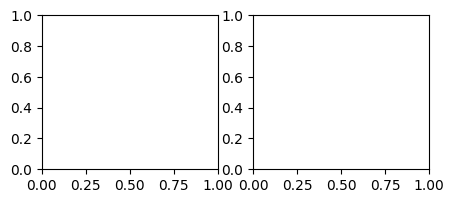

In [27]:
plt.figure(figsize=(5,2))
plt.subplot(1,2,1)
plt.subplot(1,2,2)
plt.show()

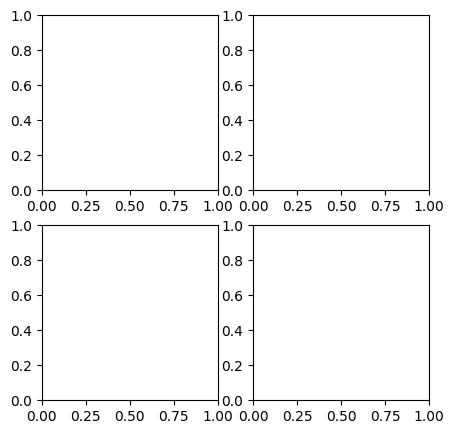

In [28]:
plt.figure(figsize=(5,5))
plt.subplot(2,2,1)
plt.subplot(2,2,2)
plt.subplot(2,2,3)
plt.subplot(2,2,4)
plt.show()

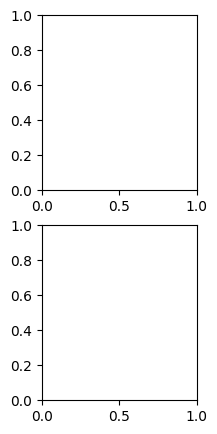

In [29]:
plt.figure(figsize=(2,5))
plt.subplot(2,1,1)
plt.subplot(2,1,2)
plt.show()

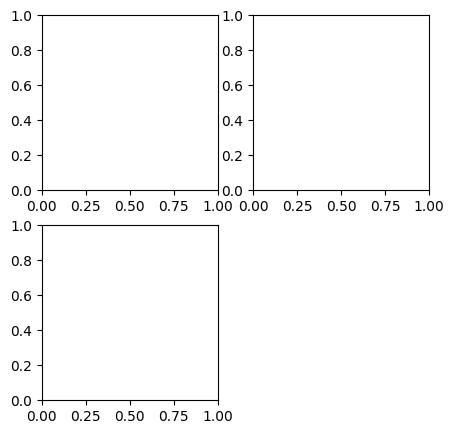

In [30]:
plt.figure(figsize=(5,5))
plt.subplot(2,2,1)
plt.subplot(2,2,2)
plt.subplot(2,2,3)
plt.show()

Arrivez-vous à déduire la logique derrière l’affichage des subplots ?

De manière un peu plus élaborée :

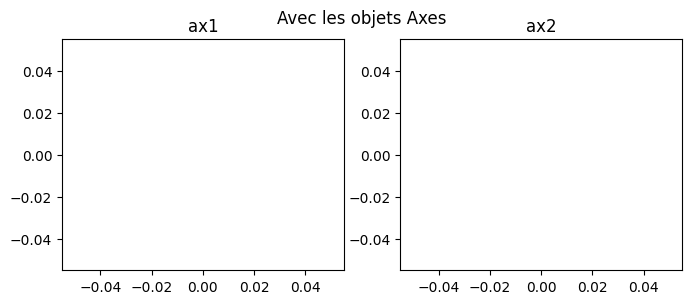

In [31]:
fig = plt.figure(figsize=(8,3))

ax1 = fig.add_subplot(1,2,1) # on ajoute les Axes à la figure au fur et à mesure
ax1.plot()
ax1.set_title('ax1')

ax2 = fig.add_subplot(1,2,2)
ax2.plot()
ax2.set_title('ax2')

# Global figure methods
fig.suptitle('Avec les objets Axes')
plt.show()



Une méthode encore plus élaborée, et explicite.
On peut dès l’appel de ```plt.subplots()``` spécifier les « dimensions » de la figure avec une matrice (nd-array). Il suffit alors d’indiquer la position dans cette matrice de chaque subplot :

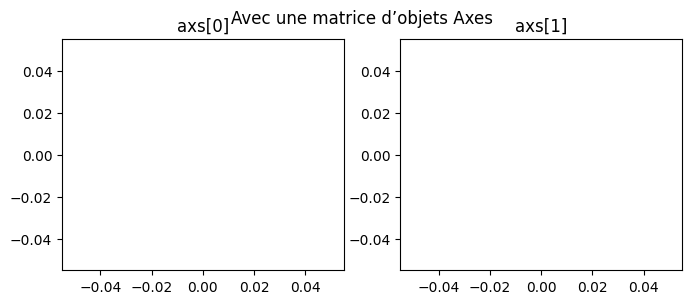

In [33]:
fig, axs = plt.subplots(1, 2, figsize=(8,3)) 

axs[0].plot()
axs[0].set_title('axs[0]')

axs[1].plot()
axs[1].set_title('axs[1]')

plt.suptitle('Avec une matrice d’objets Axes')
plt.show()



In [34]:
type(axs)

numpy.ndarray

In [35]:
axs

array([<Axes: title={'center': 'axs[0]'}>,
       <Axes: title={'center': 'axs[1]'}>], dtype=object)

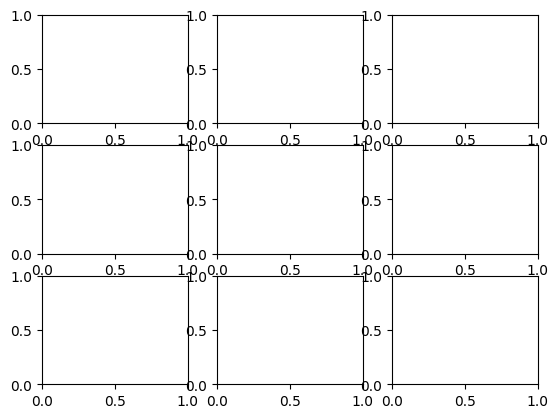

In [36]:
fig, axs_3x3 = plt.subplots(3, 3)

In [37]:
axs_3x3

array([[<Axes: >, <Axes: >, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >]], dtype=object)

On pourra utiliser des boucle pour parcourir cette nd-array et créer des subplots de manière itérative en parcourant de même les données correspondantes (avec des boucles).

### Une méthode « low-level » : ```GridSpec```

Il s’agit d’une classe à qui l’on va donner en argument quand on l’instancie le nombre de lignes et de colonnes dans notre figure. Ensuite on ajoute un subplot sur des slices de lignes et colonnes si on veut un subplot qui s’étale sur plusieurs lignes ou colonnes (il faut donc bien maîtriser les slices pour s’y retrouver !)

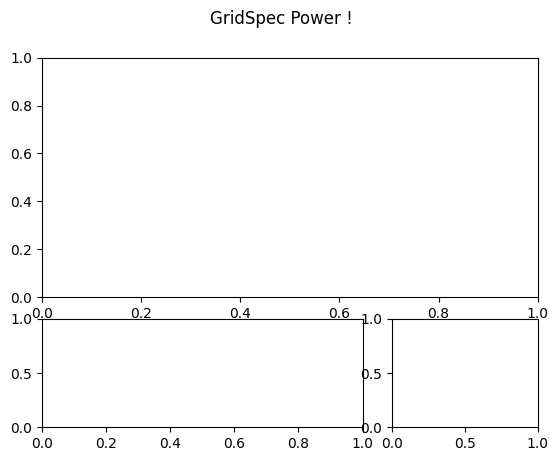

In [38]:
fig = plt.figure()
fig.suptitle("GridSpec Power !")

gs = plt.GridSpec(3, 3)
ax1 = fig.add_subplot(gs[:-1, :]) # on prend les lignes du début jusqu’à l’avant dernière 
                                  # et toutes les colonnes
ax2 = fig.add_subplot(gs[-1, :-1]) # on prend la dernière ligne, et les colonnes du début 
                                    # jusqu’à l’avant dernière
                                    # bien sûr on aurait pu écrire gs[2, :-1]
ax3 = fig.add_subplot(gs[-1, -1]) # on prend la dernière ligne et la dernière colonne
                                    # bien sûr on aurait pu écrire gs[2, 2]

plt.show()

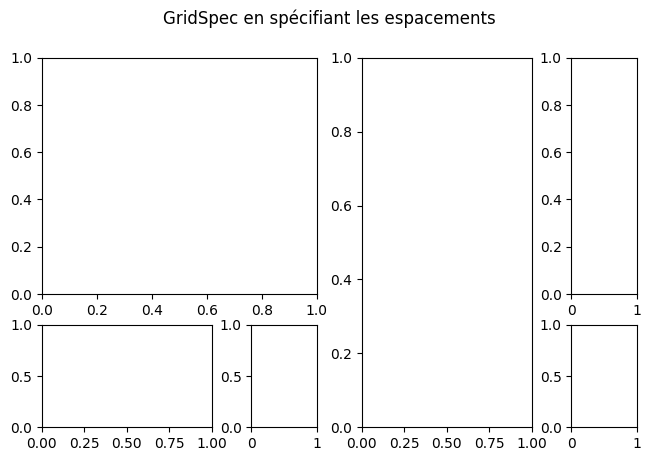

In [39]:
fig = plt.figure()
fig.suptitle('GridSpec en spécifiant les espacements')

# Modifiez les valeurs des espacements pour voir comment cela réagit !

gs1 = plt.GridSpec(3, 3, left=0.05, right=0.48, wspace=0.6, hspace=0.3)
ax1 = fig.add_subplot(gs1[:-1, :])
ax2 = fig.add_subplot(gs1[-1, :-1])
ax3 = fig.add_subplot(gs1[-1, -1])

gs2 = plt.GridSpec(3, 3, left=0.55, right=0.98, wspace=0.6, hspace=0.3)
ax4 = fig.add_subplot(gs2[:, :-1])
ax5 = fig.add_subplot(gs2[:-1, -1])
ax6 = fig.add_subplot(gs2[-1, -1])

plt.show()

N’hésitez pas à lire [cette page](https://matplotlib.org/stable/users/explain/axes/arranging_axes.html) (même si elle fait un peu mal à la tête) de la documentation de MatploLib sur différentes méthodes pour les subplots.

## Exercice

À partir des données que vous avez choisis, tracez des graphes avec des subplots (par exemple, un subplot par année ou par pays).

In [ ]:
# À vous de jouer !!!!